In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import tensorflow as tf
import os

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import train_test_split


In [2]:
# Importing the Data                                           Shape

hyperberlinnn = loadmat('hyperberlinnn.mat')                      
ch_data = hyperberlinnn['InputImage1D']                     #(90000*114)
ch_result = hyperberlinnn['GroundTruthImage1D']             #(90000*1)
Tr_data = hyperberlinnn['Train']                            #(300*300)
Tr_result = hyperberlinnn['Train1D']                        #(90000*1)
groundTruth = hyperberlinnn['GroundTruth']

In [3]:
# Standardization
# Split into train (2/3) and test (1/3) sets

image1 = StandardScaler().fit_transform(ch_data)
image2 = StandardScaler().fit_transform(ch_result)
X_train, X_test, y_train, y_test = train_test_split(image1 , image2 , test_size = 0.30 , train_size = 0.70 , random_state = 42)
print(np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))



(62999, 114) (27000, 114) (62999, 1) (27000, 1)


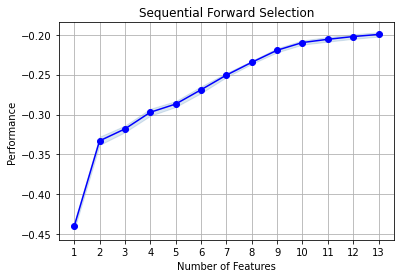

In [4]:

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring= 'neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_train, y_train)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()




In [5]:
sfs.k_score_

-0.19959821766016156

In [6]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(86,)","[-0.4349105930934966, -0.458511225851396, -0.4...",-0.440213,"(86,)",0.009809,0.013207,0.004402
2,"(86, 101)","[-0.344083561556546, -0.35359226035270824, -0....",-0.332961,"(86, 101)",0.011512,0.015499,0.005166
3,"(86, 87, 101)","[-0.3254234762286019, -0.33000115250993933, -0...",-0.318047,"(86, 87, 101)",0.009193,0.012377,0.004126
4,"(86, 87, 88, 101)","[-0.3142681762548441, -0.3136108852781329, -0....",-0.297178,"(86, 87, 88, 101)",0.009762,0.013144,0.004381
5,"(61, 86, 87, 88, 101)","[-0.30006316059680377, -0.29839911403813296, -...",-0.286853,"(61, 86, 87, 88, 101)",0.0082,0.011041,0.00368
6,"(61, 86, 87, 88, 94, 101)","[-0.28818532102865285, -0.2769420190838992, -0...",-0.268965,"(61, 86, 87, 88, 94, 101)",0.00939,0.012643,0.004214
7,"(61, 86, 87, 88, 94, 95, 101)","[-0.2621757564918251, -0.25491346009664906, -0...",-0.250597,"(61, 86, 87, 88, 94, 95, 101)",0.005832,0.007853,0.002618
8,"(61, 86, 87, 88, 93, 94, 95, 101)","[-0.2416918075768204, -0.23856594652067556, -0...",-0.234574,"(61, 86, 87, 88, 93, 94, 95, 101)",0.004349,0.005856,0.001952
9,"(0, 61, 86, 87, 88, 93, 94, 95, 101)","[-0.231497398302185, -0.22937475779077965, -0....",-0.219416,"(0, 61, 86, 87, 88, 93, 94, 95, 101)",0.005847,0.007873,0.002624
10,"(0, 61, 86, 87, 88, 92, 93, 94, 95, 101)","[-0.22385377625293568, -0.21809178707091922, -...",-0.209722,"(0, 61, 86, 87, 88, 92, 93, 94, 95, 101)",0.005905,0.007951,0.00265


In [7]:
sfs.k_feature_idx_



(0, 4, 6, 61, 86, 87, 88, 92, 93, 94, 95, 96, 101)

In [8]:
SFS_FS = [ 0, 4, 6, 61, 86, 87, 88, 92, 93, 94, 95, 96, 101]

In [9]:

X_train = X_train[:,SFS_FS]
X_test = X_test[:,SFS_FS]

reg = LinearRegression().fit(X_train , y_train )
pred_Tr = reg.predict(X_train)
pred_Ch = reg.predict(X_test)


In [10]:

RMSE_Ch = sqrt(mean_squared_error(y_test,pred_Ch))                               #calculate RMSE
R2_Ch = r2_score(y_test,pred_Ch)                                                 #calculate R2
print('RMSE Check =', RMSE_Ch)
print('R2 Check =', R2_Ch)

RMSE_Tr = sqrt(mean_squared_error(y_train,pred_Tr))                               #calculate RMSE
R2_Tr = r2_score(y_train,pred_Tr)                                                 #calculate R2 
print('RMSE Train =', RMSE_Tr)
print('R2 Train =', R2_Tr)


RMSE Check = 0.44411150682613465
R2 Check = 0.8035222215578959
RMSE Train = 0.44628337750941816
R2 Train = 0.8005039048322586


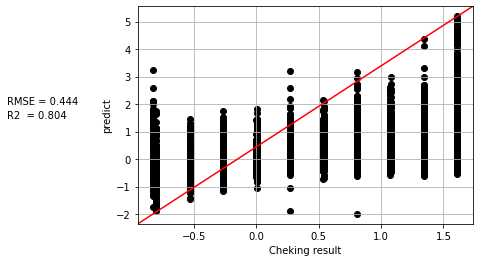

In [11]:
# Plot

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn import metrics
import sklearn.metrics, math
from sklearn.metrics import r2_score


fig, ax = plt.subplots()
ax.scatter(y_test, pred_Ch , c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

R2_score=r2_score(y_test, pred_Ch)


plt.text(-2,2,'RMSE = {:.3f}'.format(RMSE_Ch))
plt.text(-2,1.5,'R2  = {:.3f}'.format(R2_Ch))
plt.ylabel("predict")
plt.xlabel("Cheking result")
plt.grid()
plt.show()

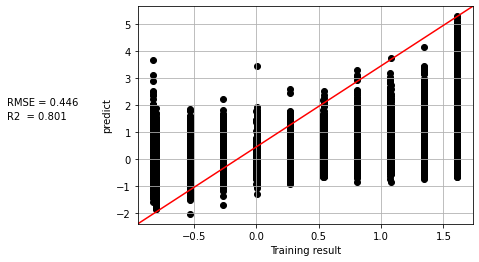

In [12]:
# Plot

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn import metrics
import sklearn.metrics, math
from sklearn.metrics import r2_score


fig, ax = plt.subplots()
ax.scatter( y_train, pred_Tr , c='black')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

R2_score=r2_score( y_train, pred_Tr )

plt.text(-2,2,'RMSE = {:.3f}'.format(RMSE_Tr))
plt.text(-2,1.5,'R2  = {:.3f}'.format(R2_Tr))
plt.ylabel("predict")
plt.xlabel("Training result")
plt.grid()
plt.show()